In [11]:
# HIDDEN

from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Interaction
from IPython.display import display
from functools import partial
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Empirical Distributions ###

Much of data science involves data from large random samples. In this section we will examine some properties of such samples.

We will start with a simple experiment: rolling a die multiple times and keeping track of which face appears. The table `die` contains the numbers of spots on the faces of a die. All the numbers appear exactly once, as we are assuming that the die is fair.

In [4]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


In [5]:
def hello(num):
    return num ** 2

interact(hello, num=(0, 100))

A Jupyter Widget

<function __main__.hello>

### A Probability Distribution ###

The histogram below helps us visualize the fact that every face appears with probability 1/6. We say that the histogram shows the *distribution* of probabilities over all the possible faces. Since all the bars represent the same percent chance, the distribution is called *uniform on the integers 1 through 6.*

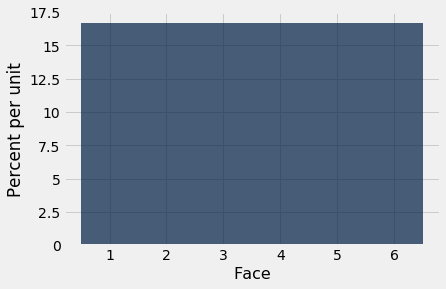

In [6]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

Variables whose successive values are separated by the same fixed amount, such as the values on rolls of a die (successive values separated by 1), are called *discrete*. The histogram above is called a *discrete* histogram. Its bins are specified by the array `die_bins` and ensure that each bar is centered over the corresponding integer value. 

It is important to remember that the die can't show 1.3 spots, or 5.2 spots – it always shows an integer number of spots. But our visualization spreads the probability of each value over the area of a bar. While this might seem a bit arbitrary at this stage of the course, it will become important later when we overlay smooth curves over discrete histograms.

Before going further, let's make sure that the numbers on the axes make sense. The probability of each face is 1/6, which is 16.67% when rounded to two decimal places. The width of each bin is 1 unit. So the height of each bar is 16.67% per unit. This agrees with the horizontal and vertical scales of the graph.

### Empirical Distributions ###
The distribution above consists of the theoretical probability of each face. It is not based on data. It can be studied and understood without any dice being rolled.

*Empirical distributions,* on the other hand, are distributions of observed data. They can be visualized by *empirical histograms*. 

Let us get some data by simulating rolls of a die. This can be done by sampling at random with replacement from the integers 1 through 6. To do this using Python, we will use the Table method `sample`, which draws at random with replacement from the rows of a table. Its argument is the sample size, and it returns a table consisting of the rows that were selected. An optional argument `with_replacement=False` specifies that the sample should be drawn without replacement, but that does not apply to rolling a die.

Here are some results of 10 rolls of a die. Drag the slider right
to see different samples.

In [7]:
def die_sample_10(sample_num=0):
    return die.sample(10)

_ = interact(die_sample_10, sample_num=(0, 20))

A Jupyter Widget

We can use the same method to simulate as many rolls as we like, and then draw empirical histograms of the results. Because we are going to do this repeatedly, we define a function `empirical_hist_die` that takes as its argument the sample size; the function rolls the die as many times as its argument and then draws a histogram.

In [14]:
def empirical_hist_die(n=10, sample_num=0):
    die.sample(n).hist(bins=np.arange(1, 8))

### Empirical Histograms ###

Here is an empirical histogram of 10 rolls. It doesn't look very much like the probability histogram above. Drag the slider to look at different sets of 10 rolls.

In [15]:
_ = interact(empirical_hist_die, n=fixed(10), sample_num=(0, 20))

A Jupyter Widget

When the sample size increases, the empirical histogram begins to look more like the histogram of theoretical probabilities. Try it out!

In [16]:
_ = interact(empirical_hist_die,
             n=widgets.ToggleButtons(options=[10, 100, 1000]),
             sample_num=(0, 20))

A Jupyter Widget

As we increase the number of rolls in the simulation, the area of each bar gets closer to 16.67%, which is the area of each bar in the probability histogram.

What we have observed in an instance of a general rule:

### The Law of Averages ###

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appears gets closer and closer to 1/6.

Here "independently and under identical conditions" means that every repetition is performed in the same way regardless of the results of all the other repetitions.